***

**XGBoost - Model**

The following notebook contains an example XGBoost model that uses PCA features.

***

- **Required Libraries:**

In [1]:
import pandas as pd
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [2]:
# Load our feature dataset.
features = pd.read_csv("../data/PCA_Features.csv")
features

,0,1,2,3,4,5,6,7,8,Label
0,0.714569,0.663124,0.222841,0.612413,-0.438989,-0.657449,0.338145,-0.606263,0.719794,1.0
1,-0.723288,-0.510638,0.464869,-0.624720,0.197015,-0.755586,-0.294245,0.836919,0.461504,1.0
2,-0.778726,-0.558944,0.284900,-0.603591,0.543677,-0.583176,-0.171069,0.626097,0.760748,1.0
3,-0.521176,-0.720748,0.457054,-0.588013,-0.084896,-0.804384,-0.618560,0.687979,0.379564,1.0
4,-0.811704,-0.508418,0.287487,-0.526766,0.424624,-0.736351,-0.252300,0.749137,0.612486,1.0
...,...,...,...,...,...,...,...,...,...,...
994,-0.789671,-0.530566,0.308090,-0.581168,0.485931,-0.652775,-0.196630,0.694529,0.692074,1.0
995,-0.723836,-0.617487,0.307848,-0.567410,0.278870,-0.774776,-0.392564,0.735487,0.552225,1.0
996,-0.511714,-0.778784,0.362828,-0.580736,0.002307,-0.814088,-0.633162,0.627288,0.453449,1.0
997,-0.888274,-0.428623,0.165084,-0.452631,0.755764,-0.473230,-0.078073,0.495080,0.865333,1.0


In [3]:
# Separate data into predictors (X) and label (y).
X = features.drop(["Label"], axis = 1)
y = features["Label"]

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 226)

In [4]:
# Convert sets into DMatrices (required by XGBoost).
d_train = xgb.DMatrix(X_train, label = y_train)
d_test = xgb.DMatrix(X_test, label = y_test)

- The following dictionary contains the default hyperparameters for XGBoost.
  - `"objective": "binary:hinge"` tells XGBoost we are doing binary classification.
  - `"eval_metric": "mae"` means we are using the Mean Absolute Error (MAE) as an evaluation metric.

In [5]:
parameters = {

    # Parameters for Tree Booster
    "max_depth": 6,
    "min_child_weight": 1,
    "eta": 0.3,
    "subsample": 1.0,
    "colsample_bytree": 1.0,

    # Learning Task Parameters
    "objective": "binary:hinge",
    "eval_metric": "mae"
}

In [6]:
# Train a model with the training set and the default parameter dictionary.
model = xgb.train(parameters, d_train, num_boost_round = 100)

In [7]:
# Use model to make a prediction of the testing set.
y_pred = model.predict(d_test)

In [8]:
# Get the accuracy score of our prediction.
accuracy_score(y_pred, y_test) * 100

92.5

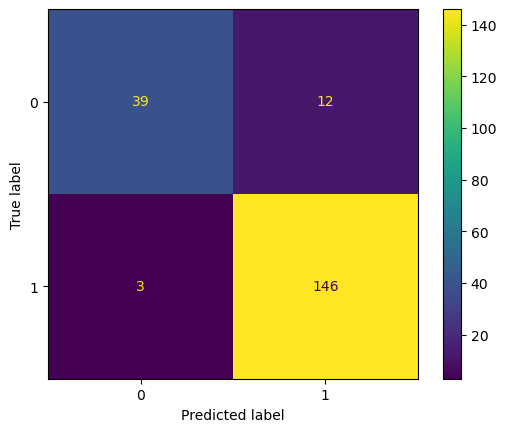

In [9]:
# Plot a confusion matrix of the prediction.
conf_matrix = confusion_matrix(y_test, y_pred)
cofn_plt = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cofn_plt.plot()
plt.show()